<a href="https://colab.research.google.com/github/adihebbalae/adihebbalae-MusicRecommenders/blob/main/Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# General Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import gdown

# for the ML
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [ ]:
!wget -O ./spotify_data_urls.csv 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Music%20Recommendation/spotify_data_urls.csv'
data_path = './spotify_data_urls.csv'


--2023-06-27 16:31:33--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Music%20Recommendation/spotify_data_urls.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 678806 (663K) [application/vnd.ms-excel]
Saving to: ‘./spotify_data_urls.csv’

./spotify_data_urls 100%[===================>] 662.90K  --.-KB/s    in 0.02s   

2023-06-27 16:31:33 (39.5 MB/s) - ‘./spotify_data_urls.csv’ saved [678806/678806]



In [ ]:
# Load in data
data = pd.read_csv(data_path)
basic_data = data[['Artist','Track','Year','url','Label']]

In [ ]:
## Your Code Here
basic_data.head(5)

,Artist,Track,Year,url,Label
0,intonation featuring joee,died in your arms,2009,https://open.spotify.com/track/0AAMVuVqJnW4PVZ...,1
1,jack johnson,monsoon,2008,https://open.spotify.com/track/7s4qhv3Txiv4oFW...,0
2,kapelle herrenweide,humppa,2009,https://open.spotify.com/track/7kZQxHjiHHf6Kqy...,0
3,2 minutos,rompan todo,2007,https://open.spotify.com/track/4RrFTURDPtSQcbZ...,0
4,sonora carruseles,la chola caderona,2015,https://open.spotify.com/track/4lFHxhQGDhRbfYe...,0


In [ ]:
print(basic_data['Track'][0], ": ", basic_data['url'][0])
print(basic_data['Track'][1], ": ", basic_data['url'][1])

died in your arms :  https://open.spotify.com/track/0AAMVuVqJnW4PVZqf5Fza8
monsoon :  https://open.spotify.com/track/7s4qhv3Txiv4oFWUccJsci


In [ ]:
print(data.columns.tolist()) # Run this!

['Unnamed: 0', 'index', 'Artist', 'Track', 'Year', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'Label', 'url']


[]

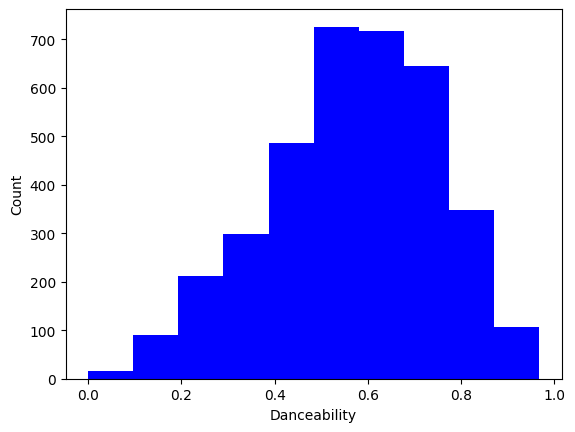

In [ ]:
plt.hist(data["danceability"], color = 'b')
plt.xlabel('Danceability')
plt.ylabel('Count')
plt.plot()

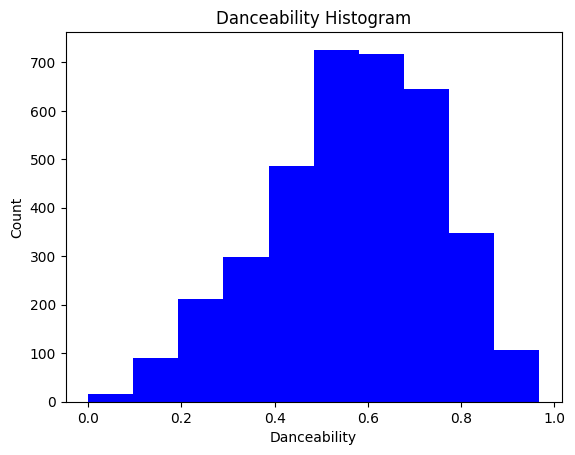

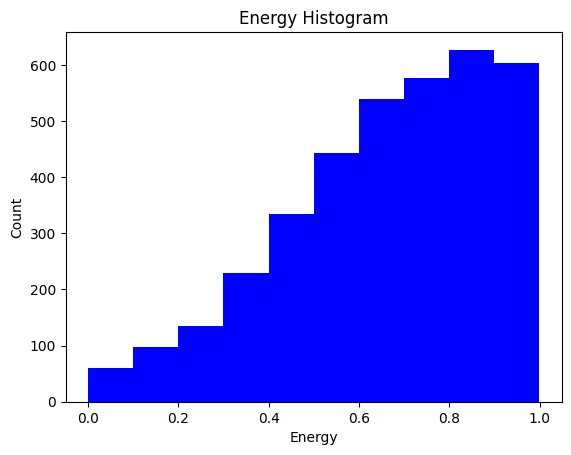

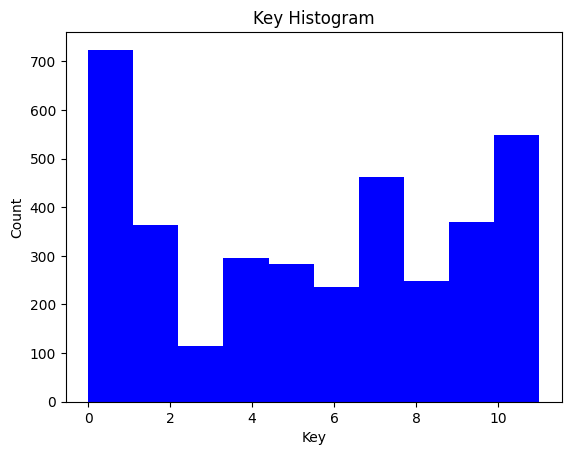

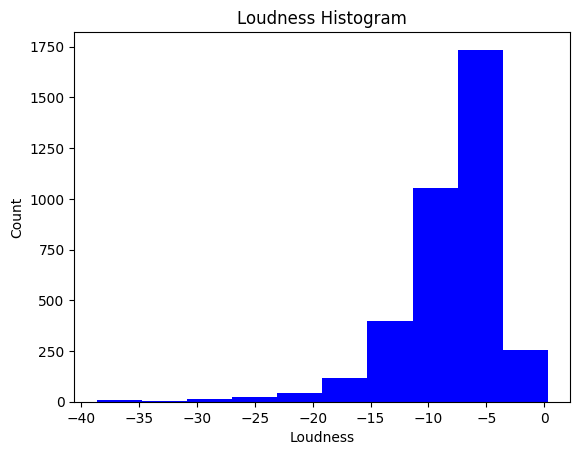

In [ ]:
# Danceability Histogram
plot1 = plt.figure(1)
plt.hist(data["danceability"], color = 'b')
plt.xlabel('Danceability')
plt.ylabel('Count')
plt.title('Danceability Histogram')
plt.plot()

### YOUR CODE HERE
# Energy Histogram code below!
plot2 = plt.figure(2)
plt.hist(data["energy"], color = 'b')
plt.xlabel('Energy')
plt.ylabel('Count')
plt.title('Energy Histogram')
plt.plot()
# Key Histogram code below!
plot3 = plt.figure(3)
plt.hist(data['key'], color = 'b')
plt.xlabel('Key')
plt.ylabel('Count')
plt.title('Key Histogram')
plt.plot()
# Loudness Histogram code below!
plot4 = plt.figure(4)
plt.hist(data["loudness"], color = 'b')
plt.xlabel('Loudness')
plt.ylabel('Count')
plt.title('Loudness Histogram')
plt.plot()
### END CODE
plt.show()

In [ ]:
subjective = data[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']] # FILL IN SUBJECTIVE FEATURES
subjective.head(10)

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0.809,0.696,0.0473,0.078400,0.000016,0.1900,0.6680
1,0.690,0.288,0.1020,0.385000,0.000000,0.1060,0.3160
2,0.516,0.642,0.0394,0.105000,0.000000,0.0719,0.7430
3,0.411,0.964,0.1320,0.000626,0.000000,0.4340,0.8250
4,0.646,0.909,0.0331,0.384000,0.127000,0.3550,0.7540
5,0.696,0.945,0.0364,0.115000,0.000000,0.6940,0.7080
6,0.935,0.608,0.0850,0.001550,0.000000,0.3420,0.0664
7,0.488,0.477,0.3110,0.045600,0.000087,0.2840,0.6530
8,0.680,0.650,0.0378,0.002030,0.000000,0.0622,0.4860
9,0.852,0.655,0.0645,0.107000,0.000021,0.1370,0.9520


In [ ]:

objective = data[['Artist', 'Track', 'Year', 'key', 'loudness', 'mode', 'tempo']] # FILL IN OBJECTIVE FEATURES
objective.head(10) # print the first 10

,Artist,Track,Year,key,loudness,mode,tempo
0,intonation featuring joee,died in your arms,2009,7,-10.352,0,126.622
1,jack johnson,monsoon,2008,6,-10.584,0,141.899
2,kapelle herrenweide,humppa,2009,2,-11.692,0,108.398
3,2 minutos,rompan todo,2007,0,-3.722,1,105.563
4,sonora carruseles,la chola caderona,2015,5,-3.508,0,95.942
5,eddie money,heaven in the back seat,1991,0,-5.310,1,120.074
6,ying yang twins,whistle while you twurk,2000,1,-7.236,0,101.992
7,spunk,marbles,2005,1,-13.353,1,60.214
8,nirvana,lithium,1991,7,-6.336,1,123.238
9,us3,cantaloop (flip fantasia),1993,5,-11.498,0,115.962


In [ ]:
outputs = data[['Artist','Track','Label']]
outputs.head(10)

,Artist,Track,Label
0,intonation featuring joee,died in your arms,1
1,jack johnson,monsoon,0
2,kapelle herrenweide,humppa,0
3,2 minutos,rompan todo,0
4,sonora carruseles,la chola caderona,0
5,eddie money,heaven in the back seat,1
6,ying yang twins,whistle while you twurk,1
7,spunk,marbles,0
8,nirvana,lithium,1
9,us3,cantaloop (flip fantasia),1


In [ ]:
X = data[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]
y = data[['Label']]

# Take a look at our data matrix and label vector
print(X)
print(y)

      danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.809   0.696    7   -10.352     0       0.0473      0.078400   
1            0.690   0.288    6   -10.584     0       0.1020      0.385000   
2            0.516   0.642    2   -11.692     0       0.0394      0.105000   
3            0.411   0.964    0    -3.722     1       0.1320      0.000626   
4            0.646   0.909    5    -3.508     0       0.0331      0.384000   
...            ...     ...  ...       ...   ...          ...           ...   
3638         0.625   0.772    5    -5.919     1       0.0314      0.115000   
3639         0.550   0.593   10    -6.926     1       0.0292      0.025800   
3640         0.796   0.688    7    -7.932     0       0.0558      0.001310   
3641         0.681   0.592    8   -12.565     1       0.0717      0.089900   
3642         0.776   0.359   11   -15.978     1       0.2020      0.157000   

      instrumentalness  liveness  valence    tempo  
0         

In [ ]:
from numpy.random.mtrand import randint
# Step 1: Split our data into training and testing
for i in range(1,10):
  l = randint(1, 100)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = l)
  # Step 2: Initialize our logistic regression model and train it
  model = LogisticRegression()
  model.fit(X_train, y_train)
  # Step 3: Calculate print the score
  accuracy = model.score(X_test, y_test)

  print(accuracy, l)

0.6844993141289437 11
0.6968449931412894 63
0.6968449931412894 50
0.6968449931412894 66
0.7064471879286695 76
0.6968449931412894 50
0.7050754458161865 69
0.6954732510288066 60
0.6982167352537723 27


In [ ]:
coef = model.coef_
pd.DataFrame(list(zip(X, coef[0])), columns=['feature', 'coef'])

,feature,coef
0,danceability,3.265680
1,energy,-1.167395
2,key,-0.011613
3,loudness,0.145948
4,mode,0.056183
5,speechiness,-1.455395
6,acousticness,-1.446888
7,instrumentalness,-3.615601
8,liveness,-1.103293
9,valence,-0.953892


In [ ]:
X_2 = data[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']] # Whatever features you'd like!
y_2 = data[['Label']]

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.2, random_state = l)
# Step 2: Initialize our logistic regression model and train it
model = LogisticRegression()
model.fit(X_train, y_train)
# Step 3: Calculate print the score
accuracy = model.score(X_test, y_test)
print(accuracy)

0.6941015089163237


In [ ]:
## Your Code here
for i in range(1,50):
  l = randint(1, 100)
  X_2 = data[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']] # Whatever features you'd like!
  y_2 = data[['Label']]

  X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.2, random_state = l)
  # Step 2: Initialize our logistic regression model and train it
  model = LogisticRegression()
  model.fit(X_train, y_train)
  # Step 3: Calculate print the score
  accuracy = model.score(X_test, y_test)
  print(accuracy)

0.6735253772290809
0.6721536351165981
0.6652949245541838
0.6776406035665294
0.6831275720164609
0.7064471879286695
0.691358024691358
0.7037037037037037
0.6488340192043895
0.6803840877914952
0.6611796982167353
0.6652949245541838
0.6735253772290809
0.6707818930041153
0.7078189300411523
0.6652949245541838
0.635116598079561
0.6941015089163237
0.6995884773662552
0.7023319615912208
0.6611796982167353
0.7078189300411523
0.663923182441701
0.6735253772290809
0.6941015089163237
0.7091906721536351
0.6707818930041153
0.635116598079561
0.6570644718792867
0.6899862825788752
0.663923182441701
0.6886145404663924
0.6776406035665294
0.6707818930041153
0.6707818930041153
0.7023319615912208
0.7064471879286695
0.6954732510288066
0.6803840877914952
0.663923182441701
0.663923182441701
0.6790123456790124
0.6831275720164609
0.6803840877914952
0.6858710562414266
0.6529492455418381
0.6941015089163237
0.6831275720164609
0.6776406035665294


In [ ]:
## Try a few more algorithms. Your Code Here.